## Identification of the world's natural scenery
### Problem Description
In this problem we will seek to train convolutional neural networks for a set of images corresponding to natural scenarios of the world, with six different classes:

1.-) Buildings

2.-) Forest
 
3.-) Glacier
 
4.-) Mountain
 
5.-) Sea
 
6.-) Street
 
 
Our goal is to predict the type of scenario represented in the images.

### Import Dependencies
 
First of all we will start by importing all the dependencies needed to run this script.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

### Data import, Visualization and Quick EDA.

We load the provided data, in this case replace the path of the files by your own path.

In [2]:
cnn_train_X = np.load(r'D:\Trabajo\Data Scientist\Data Scientist Projects\Identification_Natural_Scenery\DataSet\cnn_train_X.npy')
cnn_train_y = np.load(r'D:\Trabajo\Data Scientist\Data Scientist Projects\Identification_Natural_Scenery\DataSet\cnn_train_y.npy', allow_pickle=True)
cnn_test_X = np.load(r'D:\Trabajo\Data Scientist\Data Scientist Projects\Identification_Natural_Scenery\DataSet\cnn_test_X.npy')
cnn_test_y = np.load(r'D:\Trabajo\Data Scientist\Data Scientist Projects\Identification_Natural_Scenery\DataSet\cnn_test_y.npy', allow_pickle=True)

In this cell basically what we do is to plot the number of images per class.

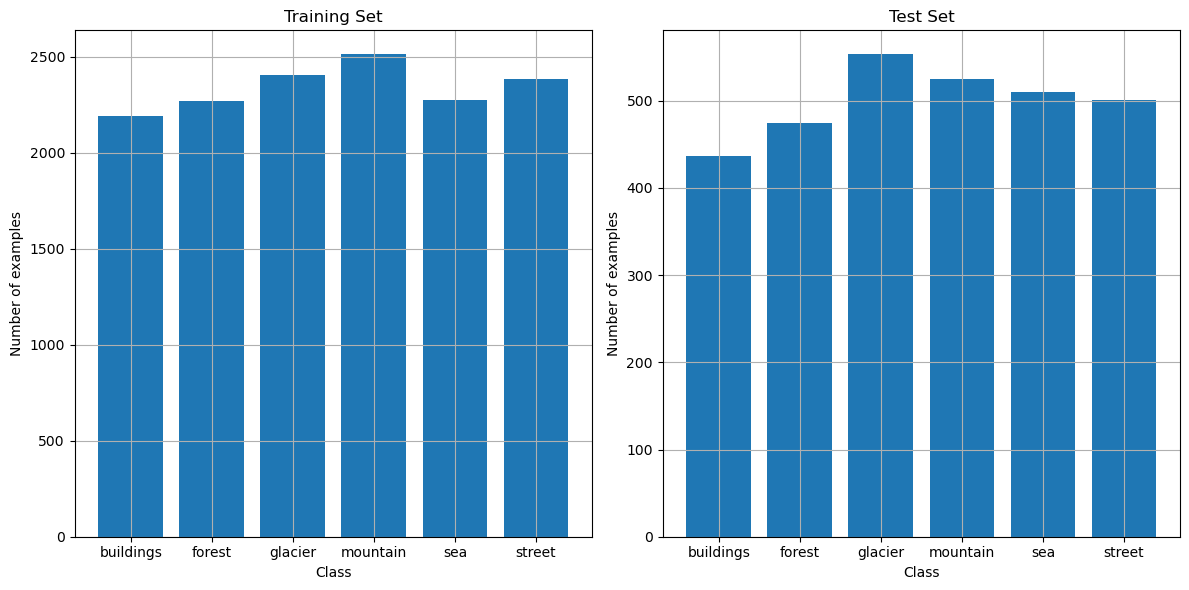

cnn_train_y
Average number of images per class: 2339.0
Lowest number of images: 2191. Class: buildings
Highest number of images: 2512. Class: mountain

Class frequency statistics:
count       6.000000
mean     2339.000000
std       115.547393
min      2191.000000
25%      2271.750000
50%      2328.000000
75%      2398.500000
max      2512.000000
dtype: float64
cnn_test_y
Average number of images per class: 500.0
Lowest number of images: 437. Class: buildings
Highest number of images: 553. Class: glacier

Class frequency statistics:
count      6.000000
mean     500.000000
std       40.447497
min      437.000000
25%      480.750000
50%      505.500000
75%      521.250000
max      553.000000
dtype: float64


In [3]:
unique_train, counts_train = np.unique(cnn_train_y, return_counts=True)
unique_test, counts_test = np.unique(cnn_test_y, return_counts=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(unique_train, counts_train, tick_label=unique_train)
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of examples')
ax1.set_title('Training Set')
ax1.grid(True)

ax2.bar(unique_test, counts_test, tick_label=unique_test)
ax2.set_xlabel('Class')
ax2.set_ylabel('Number of examples')
ax2.set_title('Test Set')
ax2.grid(True)

plt.tight_layout()
plt.show()

unique_classes_train, class_counts_train = np.unique(cnn_train_y, return_counts=True)

print('cnn_train_y')
print('Average number of images per class: ' + str(np.mean(class_counts_train)))
print("Lowest number of images: {}. Class: {}".format(class_counts_train.min(), unique_classes_train[np.argmin(class_counts_train)]))
print("Highest number of images: {}. Class: {}".format(class_counts_train.max(), unique_classes_train[np.argmax(class_counts_train)]))
print("\nClass frequency statistics:")
print(pd.Series(class_counts_train).describe())

unique_classes_test, class_counts_test = np.unique(cnn_test_y, return_counts=True)

print('cnn_test_y')
print('Average number of images per class: ' + str(np.mean(class_counts_test)))
print("Lowest number of images: {}. Class: {}".format(class_counts_test.min(), unique_classes_test[np.argmin(class_counts_test)]))
print("Highest number of images: {}. Class: {}".format(class_counts_test.max(), unique_classes_test[np.argmax(class_counts_test)]))
print("\nClass frequency statistics:")
print(pd.Series(class_counts_test).describe())

We visualized 8 random images from the training set to demonstrate what the images look like in general.

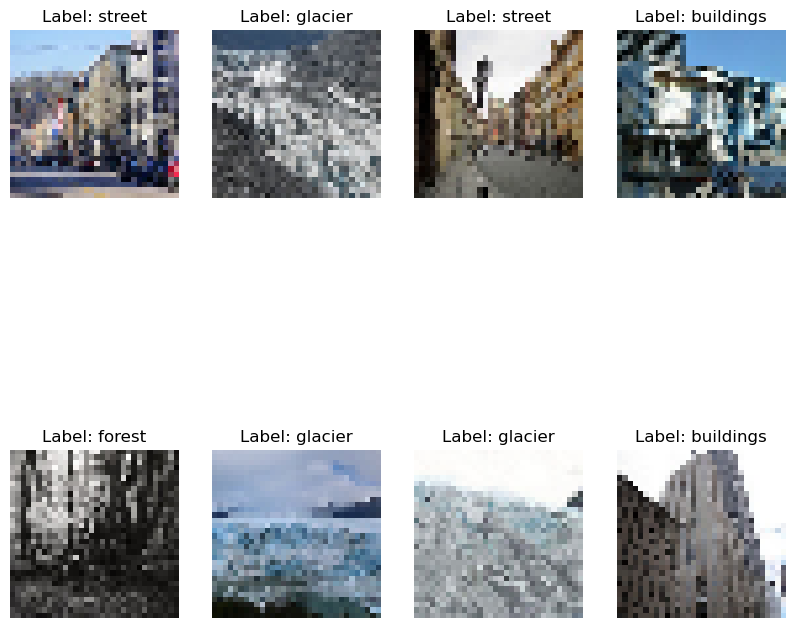

In [4]:
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    index = np.random.randint(0, len(cnn_train_X))
    plt.imshow(cnn_train_X[index])
    plt.title(f"Label: {cnn_train_y[index]}")
    plt.axis('off')
plt.show()

### Preprocess Data and Training

In [5]:
print(pd.isnull(cnn_train_y).sum())
print(pd.isnull(cnn_test_y).sum())

0
0


Encoding of labels with OneHotEncoder.

In [6]:
encoder = OneHotEncoder(sparse=False)
train_labels_encoded = encoder.fit_transform(cnn_train_y.reshape(-1, 1))
test_labels_encoded = encoder.transform(cnn_test_y.reshape(-1, 1))

print("Example of encoded label:")
print(f"Original: {cnn_train_y[0]}, Encoded: {train_labels_encoded[0]}")

Example of encoded label:
Original: forest, Encoded: [0. 1. 0. 0. 0. 0.]


d:\Users\javie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Separation of training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((cnn_train_X, cnn_test_X)),
                                                    np.concatenate((train_labels_encoded, test_labels_encoded)),
                                                    test_size=0.33, random_state=42)

### Implementation of a Fully Connected multilayer neural network with five hidden layers to classify the images. Metrics have been deployed to measure the model's performance on the test set.

In [8]:
model1 = Sequential()

model1.add(Flatten(input_shape=(32, 32, 3)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(6, activation='softmax'))

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluation metrics.

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print("Test accuracy:", test_acc1)

Epoch 1/10
357/357 [==============================] - 4s 9ms/step - loss: 1.4434 - accuracy: 0.4233 - val_loss: 1.3024 - val_accuracy: 0.4891
Epoch 2/10
357/357 [==============================] - 3s 9ms/step - loss: 1.2497 - accuracy: 0.5078 - val_loss: 1.2084 - val_accuracy: 0.5333
Epoch 3/10
357/357 [==============================] - 3s 8ms/step - loss: 1.1717 - accuracy: 0.5480 - val_loss: 1.2649 - val_accuracy: 0.5116
Epoch 4/10
357/357 [==============================] - 3s 8ms/step - loss: 1.1277 - accuracy: 0.5668 - val_loss: 1.1859 - val_accuracy: 0.5398
Epoch 5/10
357/357 [==============================] - 3s 8ms/step - loss: 1.1022 - accuracy: 0.5776 - val_loss: 1.1164 - val_accuracy: 0.5752
Epoch 6/10
357/357 [==============================] - 3s 8ms/step - loss: 1.0493 - accuracy: 0.6003 - val_loss: 1.1486 - val_accuracy: 0.5745
Epoch 7/10
357/357 [==============================] - 3s 8ms/step - loss: 1.0272 - accuracy: 0.6057 - val_loss: 1.1357 - val_accuracy: 0.5736
Epoch 

#### A neural network model with a dense layer architecture for classification was implemented. The model was trained for 10 epochs and evaluated, achieving an accuracy of 58.45% on the test set.

### A Convolutional Neural Network has been developed using three or more convolutional layers and two or more dense layers, ensuring that the number of parameters to estimate falls within the range [3MM, 8MM], with 25 epochs. The loss curve for each epoch and the accuracy curve (test set) have been displayed.

Epoch 1/25
357/357 [==============================] - 5s 13ms/step - loss: 1.1554 - accuracy: 0.5367 - val_loss: 1.0651 - val_accuracy: 0.5975
Epoch 2/25
357/357 [==============================] - 5s 13ms/step - loss: 0.8614 - accuracy: 0.6765 - val_loss: 0.7941 - val_accuracy: 0.7088
Epoch 3/25
357/357 [==============================] - 5s 13ms/step - loss: 0.7505 - accuracy: 0.7278 - val_loss: 0.7204 - val_accuracy: 0.7330
Epoch 4/25
357/357 [==============================] - 5s 13ms/step - loss: 0.6710 - accuracy: 0.7585 - val_loss: 0.6979 - val_accuracy: 0.7464
Epoch 5/25
357/357 [==============================] - 5s 14ms/step - loss: 0.5937 - accuracy: 0.7874 - val_loss: 0.6524 - val_accuracy: 0.7654
Epoch 6/25
357/357 [==============================] - 5s 13ms/step - loss: 0.5440 - accuracy: 0.8083 - val_loss: 0.8123 - val_accuracy: 0.6983
Epoch 7/25
357/357 [==============================] - 5s 13ms/step - loss: 0.4802 - accuracy: 0.8314 - val_loss: 0.6595 - val_accuracy: 0.7721

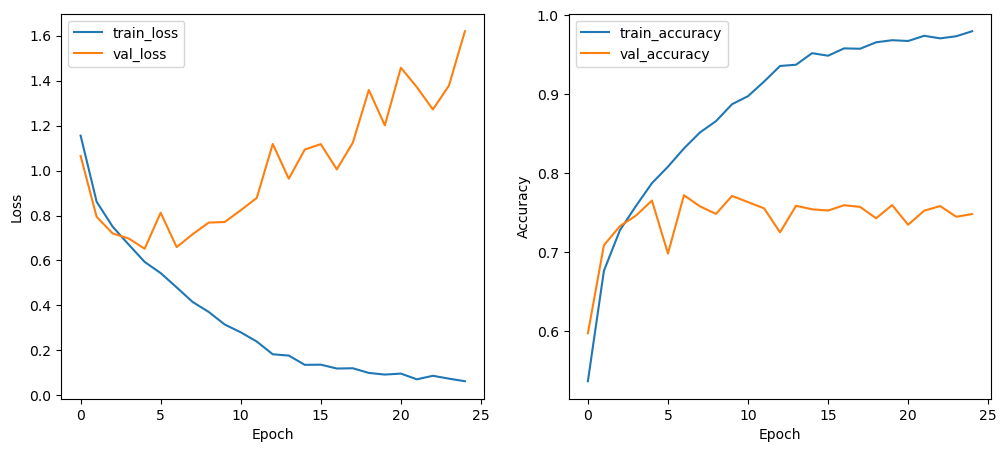

In [9]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# Evaluation metrics and loss curve for each epoch, and accuracy curve (test set).

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print("Test accuracy:", test_acc2)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### The model's results show a gradual improvement in accuracy and a reduction in loss over the 25 training epochs. However, there is a slight increase in validation loss in some epochs, indicating potential overfitting. The final accuracy on the validation set was 75%, suggesting good generalization ability, although it could still be improved with regularization techniques to avoid overfitting.

Epoch 1/25
356/356 [==============================] - 7s 19ms/step - loss: 1.4588 - accuracy: 0.4813 - val_loss: 1.1566 - val_accuracy: 0.5784
Epoch 2/25
356/356 [==============================] - 7s 18ms/step - loss: 1.1105 - accuracy: 0.6030 - val_loss: 0.9827 - val_accuracy: 0.6663
Epoch 3/25
356/356 [==============================] - 6s 18ms/step - loss: 1.0086 - accuracy: 0.6410 - val_loss: 0.9667 - val_accuracy: 0.6772
Epoch 4/25
356/356 [==============================] - 6s 18ms/step - loss: 0.9525 - accuracy: 0.6658 - val_loss: 0.7896 - val_accuracy: 0.7286
Epoch 5/25
356/356 [==============================] - 6s 18ms/step - loss: 0.9061 - accuracy: 0.6825 - val_loss: 0.8229 - val_accuracy: 0.7206
Epoch 6/25
356/356 [==============================] - 7s 19ms/step - loss: 0.8732 - accuracy: 0.6953 - val_loss: 0.7621 - val_accuracy: 0.7378
Epoch 7/25
356/356 [==============================] - 7s 19ms/step - loss: 0.8440 - accuracy: 0.7054 - val_loss: 0.7449 - val_accuracy: 0.7449

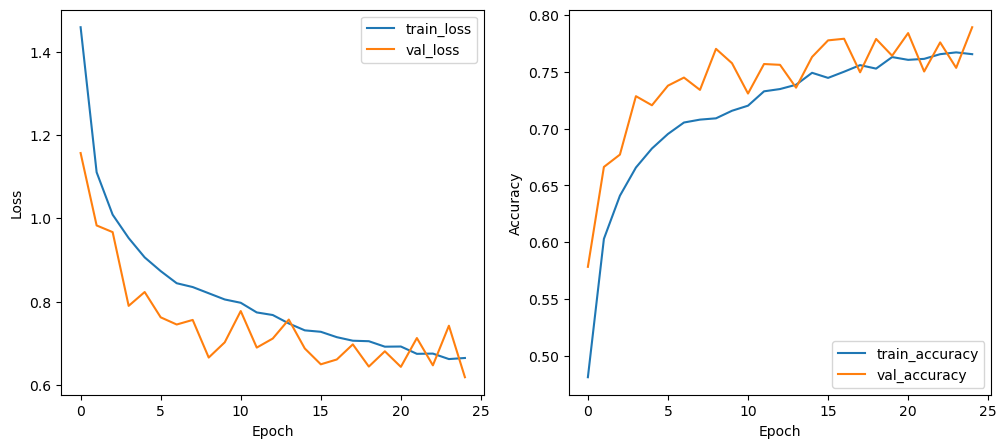

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(Dense(6, activation='softmax'))

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=25,
                    validation_data=(X_test, y_test))

test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print("Test accuracy:", test_acc3)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='train_accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### The regularized model shows an improvement in accuracy compared to the previous model, achieving an accuracy of 78.92% on the test set. L2 regularization applied to the dense layers seems to have helped reduce overfitting, as the gap between training and validation accuracy has narrowed compared to the model without regularization. The loss and accuracy plots show a smoother convergence, indicating better generalization of the model.

## The following cell implements a convolutional neural network aimed at improving the generalization capability compared to the previous model. This model uses a total of 12 layers, and its performance will be measured.

Epoch 1/25
357/357 [==============================] - 23s 62ms/step - loss: 1.3874 - accuracy: 0.3520 - val_loss: 1.1601 - val_accuracy: 0.4625
Epoch 2/25
357/357 [==============================] - 22s 62ms/step - loss: 1.0761 - accuracy: 0.5565 - val_loss: 1.0115 - val_accuracy: 0.6115
Epoch 3/25
357/357 [==============================] - 22s 61ms/step - loss: 0.9503 - accuracy: 0.6358 - val_loss: 1.0240 - val_accuracy: 0.6195
Epoch 4/25
357/357 [==============================] - 22s 61ms/step - loss: 0.8386 - accuracy: 0.6848 - val_loss: 0.8109 - val_accuracy: 0.6965
Epoch 5/25
357/357 [==============================] - 22s 61ms/step - loss: 0.7508 - accuracy: 0.7288 - val_loss: 0.8532 - val_accuracy: 0.6781
Epoch 6/25
357/357 [==============================] - 22s 61ms/step - loss: 0.6785 - accuracy: 0.7598 - val_loss: 0.7486 - val_accuracy: 0.7360
Epoch 7/25
357/357 [==============================] - 22s 61ms/step - loss: 0.6186 - accuracy: 0.7877 - val_loss: 0.7018 - val_accuracy:

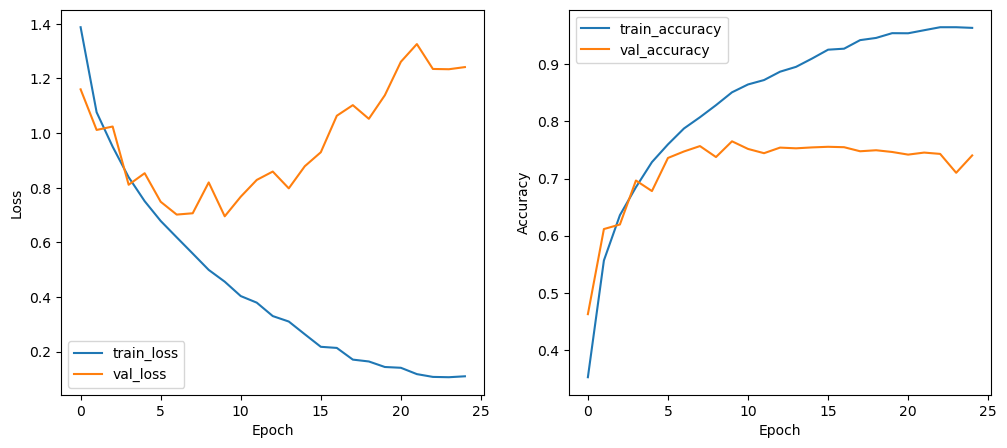

In [11]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(6, activation='softmax'))

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

test_loss4, test_acc4 = model4.evaluate(X_test, y_test)
print("Test accuracy:", test_acc4)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='train_loss')
plt.plot(history4.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='train_accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### The implemented convolutional neural network model, consisting of a total of 12 layers (including both convolutional and dense layers), aimed to enhance generalization compared to the previous model. However, despite training for 25 epochs, the model achieved a validation accuracy of approximately 74.04%, which did not significantly improve over the baseline model.

#### In addition, for our Convolutional Neural Network (CNN) model design, we opted to utilize a total of 12 layers. This decision stemmed from the necessity to circumvent potential issues like 'Negative dimension size' errors and the threat of overfitting through heightened model complexity. The inclusion of additional dense layers, as opposed to pooling layers, could lead to excessive complexity and necessitate substantial processing time. The estimated processing time on a high-end computer is approximately 4 hours, though this duration may extend on less powerful systems due to the model's structure and the computer's capabilities.

### After training the model, it was applied to the prediction set, its performance was measured, and it was compared with the performance calculated in the previous model. For which label does the model make the most mistakes? Eight random images were shown with the label predicted by the model.

229/229 [==============================] - 1s 4ms/step
Label for which the model is most confused: 0


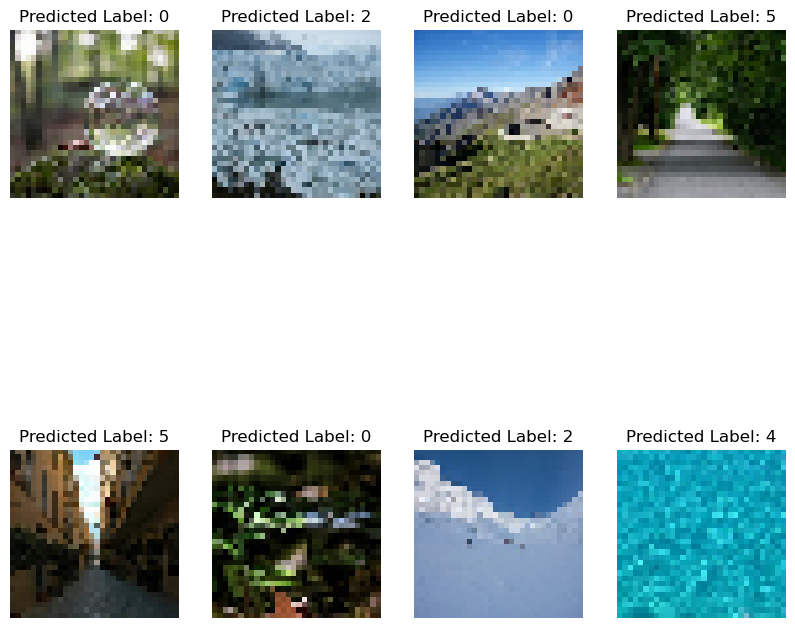

In [12]:
cnn_pred_X = np.load(r'C:\Users\javie\Documents\Python Scripts\Procesamiento y redes recurrentes I\DataSet\cnn_pred_X.npy')

predictions = model3.predict(cnn_pred_X)

predicted_labels = np.argmax(predictions, axis=1)

unique_labels, label_counts = np.unique(predicted_labels, return_counts=True)
most_confused_label = unique_labels[np.argmax(label_counts)]

print("Label for which the model is most confused:", most_confused_label)

plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    index = np.random.randint(0, len(cnn_pred_X))
    plt.imshow(cnn_pred_X[index])
    plt.title(f"Predicted Label: {predicted_labels[index]}")
    plt.axis('off')
plt.show()

#### In the cell above, we can conclude that the model correctly predicts the images, except for the buildings (0), which is where there is more confusion. In the cell below, what was basically done was to decode the labels to know which label corresponds to each predicted image.

In [13]:
all_decoded_train_labels = encoder.inverse_transform(train_labels_encoded)
all_decoded_test_labels = encoder.inverse_transform(test_labels_encoded)

from collections import defaultdict

decoded_label_counts = defaultdict(int)

unique_labels = defaultdict(set)

for i, (original_label, decoded_label) in enumerate(zip(train_labels_encoded, all_decoded_train_labels)):
    decoded_label_str = decoded_label[0]
    original_label_index = original_label.argmax()
    decoded_label_counts[(original_label_index, decoded_label_str)] += 1

    unique_labels[decoded_label_str].add(original_label_index)

for (original_label_index, decoded_label_str), count in decoded_label_counts.items():
    original_labels = ', '.join([str(x) for x in unique_labels[decoded_label_str]])
    print(f'Original (Position): {original_labels}, Decoded: {decoded_label_str}, Count: {count}')

Original (Position): 1, Decoded: forest, Count: 2271
Original (Position): 0, Decoded: buildings, Count: 2191
Original (Position): 2, Decoded: glacier, Count: 2404
Original (Position): 5, Decoded: street, Count: 2382
Original (Position): 3, Decoded: mountain, Count: 2512
Original (Position): 4, Decoded: sea, Count: 2274
